# Worksheet 2 - Root Finding methods

In [1]:
# required imports
import numpy as np
import matplotlib.pyplot as plt

# Q1

Our function is given by 
    $$ f(x) = \frac{1}{3} \tan(x) -x $$
    
 For the newton raphson method, we require the derivative which is given by
 $$f'(x) = \frac{1}{3} \sec^2(x) -1$$

In [2]:
def f(x):
    y = (1/3)*np.tan(x) - x
#     y = (x-2)
    return y
def dv(x):
    y = (1/3) * (np.cos(x))**(-2) - 1
    return y

In [3]:
def bisection(a,b,f,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c)"))
    count = 0
    if abs(f(a))<=tol:
        return a
    elif abs(f(b))<=tol:
        return b
    if f(a)*f(b)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a)
        fb = f(b)
        fc = f(c)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c

In [4]:
bisection(1,1.4,f,0.00001,1000)

n          a          b          c       f(c)
 0   1.000000   1.400000   1.200000  -0.342616
 1   1.200000   1.400000   1.300000  -0.099299
 2   1.300000   1.400000   1.350000   0.135074
 3   1.300000   1.350000   1.325000   0.003715
 4   1.300000   1.325000   1.312500  -0.050821
 5   1.312500   1.325000   1.318750  -0.024366
 6   1.318750   1.325000   1.321875  -0.010537
 7   1.321875   1.325000   1.323437  -0.003465
 8   1.323437   1.325000   1.324219   0.000112
 9   1.323437   1.324219   1.323828  -0.001680
10   1.323828   1.324219   1.324023  -0.000785
11   1.324023   1.324219   1.324121  -0.000337
12   1.324121   1.324219   1.324170  -0.000113
13   1.324170   1.324219   1.324194  -0.000001
The root is  1.3241943359375


1.3241943359375

In [5]:
def secant(x0,x1,f,tol,maxiter):
    '''
    Parameters
        ----------
        x0 : float
            left guess
        x1 : float
            right guess
        f : function
            function whose root needs to be calculated.
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'x0' and 'x1' using the secant method
    
    '''
    fx0 = f(x0)
    fx1 = f(x1)
    count =1
    print("%1s %10s %10s %10s %10s"%("n", "x_n-2","x_n-1","x_n","f(x_n)"))

    if abs(fx0)<tol:
        print("The root is ",a)
        return a
    elif abs(fx1)<tol:
        print("The root is ",b)
        return b
    elif abs(fx1 - fx0) < tol:
        print("The secant slope appraches 0")# flatness check
        return None
    else:
        count = 1
        x2 = x1 - fx1*((x1 - x0)/(fx1 - fx0))
        fx2 = f(x2)
        fx1 = f(x1)
        fx0 = f(x0)
        err = abs(fx2)
        while err>tol:
            fx1 = f(x1)
            fx0 = f(x0)
            fx2 = f(x2)
            print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,x0,x1,x2,f(x2)))
            x2 = x1 - fx1*((x1 - x0)/(fx1 - fx0))# secant formula
            count +=1
            x0 = x1
            x1 = x2
            if abs(fx0 - fx1)<tol:
                print("Secant slope approaches 0")# flatness check
                return None
            err = abs(f(x2))
            if count == maxiter:
                print("Did not Converge")
                return None
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,x0,x1,x2,f(x2)))
    print("The root is ",x2)
    return x2

In [6]:
secant(1.2,1.4,f,0.00001,10)

n      x_n-2      x_n-1        x_n     f(x_n)
 1   1.200000   1.400000   1.278290  -0.171400
 2   1.400000   1.278290   1.278290  -0.171400
 3   1.278290   1.307921   1.307921  -0.069235
 4   1.307921   1.328002   1.328002   0.017817
 5   1.328002   1.323892   1.323892  -0.001388
 6   1.323892   1.324189   1.324189  -0.000026
 7   1.324189   1.324194   1.324194   0.000000
The root is  1.324194457712256


1.324194457712256

## Newton Raphson

In [7]:
def newtraph(x0,f, tol,maxiter, fd):
    '''
        Parameters
        ----------
        x0 : float
            Initial guess
        f: function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations required.
        fd : function
            derivative type, can be analytical or numerical
        Returns
        ---------
        returns a root around 'x0' using the Newton-Raphson Method
    '''
    if abs(f(x0))<=tol:
        print("The root is ",x0)
    elif abs(fd(x0))<=tol:# flatness check
        print("The reciprocal of the derivative will blow up. Pls choose a different point")
    else:
        print("%1s %10s %10s %10s"%("n", "x_n-1","x_n","f(x_n)"))
        fx0 = f(x0)
        fdx0 = fd(x0)
        x1 = x0 - fx0/fdx0# new point calculation
        err = abs(f(x1))
        count = 0
        while err > tol:
            fx0 = f(x0)
            fdx0 = fd(x0)
            x1 = x0 - fx0/fdx0# new point calculation
            fx1 = f(x1)
            print("%2d %10.6f %10.6f %10.6f"%(count,x0,x1,fx1))

            x0 = x1
            fx1 = f(x1)
            err = abs(fx1)
            count +=1
            if count == maxiter:
                print("Did not converge")
                return None
    print("%2d %10.6f %10.6f %10.6f"%(count,x0,x1,fx1))
    print("The root is ", x1)
    return x1

In [8]:
newtraph(1.4,f,0.0001,100, dv)

n      x_n-1        x_n     f(x_n)
 0   1.400000   1.349459   0.131863
 1   1.349459   1.327171   0.013871
 2   1.327171   1.324237   0.000196
 3   1.324237   1.324194   0.000000
 4   1.324194   1.324194   0.000000
The root is  1.324194458374259


1.324194458374259

## Q2

For equilibrium we need to check where $\frac{\partial V}{\partial x} =0$. The derivative of our potential is given by 
$$V'(x) = -4x^3 + 3x^2+ 2x+1$$

To calculate the derivative for the newton raphson method a numerical derivative is used, namely the five point derivative

$$f'(x) \approx \frac{-f(x+2h) + 8f(x+h) -8f(x-h)+f(x-2h)}{12h}$$

In [9]:
def dV(x):
    y = -( 4*x**3 + 3*x**2 + 2*x + 1)
    return y
def numdiff(x, f=dV, h=0.001):
    y = - f(x + 2*h) + 8*f(x+h) -8*f(x-h) + f(x-2*h)
    y = y/(12 *h)
    return y

In [10]:
newtraph(-0.5,dV,0.0001,100, numdiff)

n      x_n-1        x_n     f(x_n)
 0  -0.500000  -0.625000   0.054688
 1  -0.625000  -0.606383   0.001534
 2  -0.606383  -0.605830   0.000001
 3  -0.605830  -0.605830   0.000001
The root is  -0.6058300580523305


-0.6058300580523305

# Q3

The turning points are defined as the points where
$$V(x) = E$$
which is calculated by finding the roots to
$$\phi(x) = V(x) -E = x^4 + \left(\frac{2x}{3}\right)^3 -x^2+0.125$$

In [11]:
def V(x):
    y = x**4 + ((2/3)*x)**3 - x**2 + 0.125
    return y

## Turning points using bisection

### Left well Turning points 

In [12]:
lw1 = round(bisection(-0.5,0,V,0.000001,100),5)

n          a          b          c       f(c)
 0  -0.500000   0.000000  -0.250000   0.061777
 1  -0.500000  -0.250000  -0.375000  -0.011475
 2  -0.375000  -0.250000  -0.312500   0.027838
 3  -0.375000  -0.312500  -0.343750   0.008763
 4  -0.375000  -0.343750  -0.359375  -0.001223
 5  -0.359375  -0.343750  -0.351562   0.003805
 6  -0.359375  -0.351562  -0.355469   0.001300
 7  -0.359375  -0.355469  -0.357422   0.000041
 8  -0.359375  -0.357422  -0.358398  -0.000591
 9  -0.358398  -0.357422  -0.357910  -0.000275
10  -0.357910  -0.357422  -0.357666  -0.000117
11  -0.357666  -0.357422  -0.357544  -0.000038
12  -0.357544  -0.357422  -0.357483   0.000001
13  -0.357544  -0.357483  -0.357513  -0.000018
14  -0.357513  -0.357483  -0.357498  -0.000009
15  -0.357498  -0.357483  -0.357491  -0.000004
16  -0.357491  -0.357483  -0.357487  -0.000001
17  -0.357487  -0.357483  -0.357485  -0.000000
The root is  -0.3574848175048828


In [13]:
lw2 = round(bisection(-1.5,-1,V,0.000001,100),5)

n          a          b          c       f(c)
 0  -1.500000  -1.000000  -1.250000   0.425203
 1  -1.250000  -1.000000  -1.125000   0.039307
 2  -1.125000  -1.000000  -1.062500  -0.084873
 3  -1.125000  -1.062500  -1.093750  -0.027868
 4  -1.125000  -1.093750  -1.109375   0.004401
 5  -1.109375  -1.093750  -1.101562  -0.012057
 6  -1.109375  -1.101562  -1.105469  -0.003909
 7  -1.109375  -1.105469  -1.107422   0.000226
 8  -1.107422  -1.105469  -1.106445  -0.001847
 9  -1.107422  -1.106445  -1.106934  -0.000812
10  -1.107422  -1.106934  -1.107178  -0.000294
11  -1.107422  -1.107178  -1.107300  -0.000034
12  -1.107422  -1.107300  -1.107361   0.000096
13  -1.107361  -1.107300  -1.107330   0.000031
14  -1.107330  -1.107300  -1.107315  -0.000002
15  -1.107330  -1.107315  -1.107323   0.000015
16  -1.107323  -1.107315  -1.107319   0.000007
17  -1.107319  -1.107315  -1.107317   0.000002
18  -1.107317  -1.107315  -1.107316   0.000000
The root is  -1.107316017150879


### Right Well turning points

In [14]:
rw1 = round(bisection(0.5,0.2,V,0.000001,100),5)
rw1

n          a          b          c       f(c)
 0   0.500000   0.200000   0.350000   0.030210
 1   0.500000   0.350000   0.425000  -0.000254
 2   0.425000   0.350000   0.387500   0.014631
 3   0.425000   0.387500   0.406250   0.007065
 4   0.425000   0.406250   0.415625   0.003370
 5   0.425000   0.415625   0.420312   0.001548
 6   0.425000   0.420312   0.422656   0.000644
 7   0.425000   0.422656   0.423828   0.000194
 8   0.425000   0.423828   0.424414  -0.000030
 9   0.424414   0.423828   0.424121   0.000082
10   0.424414   0.424121   0.424268   0.000026
11   0.424414   0.424268   0.424341  -0.000002
12   0.424341   0.424268   0.424304   0.000012
13   0.424341   0.424304   0.424323   0.000005
14   0.424341   0.424323   0.424332   0.000002
15   0.424341   0.424332   0.424336  -0.000000
The root is  0.4243362426757813


0.42434

In [15]:
rw2 = round(bisection(0.5,0.8,V,0.000001,100),5)

n          a          b          c       f(c)
 0   0.500000   0.800000   0.650000  -0.037623
 1   0.650000   0.800000   0.725000  -0.011431
 2   0.725000   0.800000   0.762500   0.012982
 3   0.725000   0.762500   0.743750  -0.000273
 4   0.743750   0.762500   0.753125   0.006084
 5   0.743750   0.753125   0.748438   0.002839
 6   0.743750   0.748438   0.746094   0.001267
 7   0.743750   0.746094   0.744922   0.000493
 8   0.743750   0.744922   0.744336   0.000109
 9   0.743750   0.744336   0.744043  -0.000082
10   0.744043   0.744336   0.744189   0.000014
11   0.744043   0.744189   0.744116  -0.000034
12   0.744116   0.744189   0.744153  -0.000010
13   0.744153   0.744189   0.744171   0.000002
14   0.744153   0.744171   0.744162  -0.000004
15   0.744162   0.744171   0.744167  -0.000001
16   0.744167   0.744171   0.744169   0.000000
The root is  0.7441688537597658


## Turning Points using secant

### Left Well turning point

In [16]:
slw1 = round(secant(-0.5,0,V,0.000001,100),5)


n      x_n-2      x_n-1        x_n     f(x_n)
 1  -0.500000   0.000000  -0.278351   0.047134
 2   0.000000  -0.278351  -0.278351   0.047134
 3  -0.278351  -0.446842  -0.446842  -0.061236
 4  -0.446842  -0.351633  -0.351633   0.003760
 5  -0.351633  -0.357141  -0.357141   0.000222
 6  -0.357141  -0.357487  -0.357487  -0.000001
 7  -0.357487  -0.357485  -0.357485   0.000000
The root is  -0.3574848131891849


In [17]:
slw2 = round(secant(-1.5,-1,V,0.000001,100),5)


n      x_n-2      x_n-1        x_n     f(x_n)
 1  -1.500000  -1.000000  -1.040615  -0.119136
 2  -1.000000  -1.040615  -1.040615  -0.119136
 3  -1.040615  -1.133381  -1.133381   0.059150
 4  -1.133381  -1.102604  -1.102604  -0.009899
 5  -1.102604  -1.107017  -1.107017  -0.000635
 6  -1.107017  -1.107319  -1.107319   0.000008
 7  -1.107319  -1.107316  -1.107316  -0.000000
The root is  -1.107315816754779


### Right well turning points

In [18]:
srw1 = round(secant(0.5,0.2,V,0.000001,100),5)


n      x_n-2      x_n-1        x_n     f(x_n)
 1   0.500000   0.200000   0.433246  -0.003375
 2   0.200000   0.433246   0.433246  -0.003375
 3   0.433246   0.424722   0.424722  -0.000148
 4   0.424722   0.424331   0.424331   0.000002
 5   0.424331   0.424336   0.424336  -0.000000
The root is  0.4243356508394301


In [19]:
srw2 = round(secant(0.5,0.8,V,0.000001,100),5)

n      x_n-2      x_n-1        x_n     f(x_n)
 1   0.500000   0.800000   0.606441  -0.041432
 2   0.800000   0.606441   0.606441  -0.041432
 3   0.606441   0.697847   0.697847  -0.024136
 4   0.697847   0.825402   0.825402   0.074484
 5   0.825402   0.729064   0.729064  -0.009184
 6   0.729064   0.739639   0.739639  -0.002894
 7   0.739639   0.744505   0.744505   0.000219
 8   0.744505   0.744162   0.744162  -0.000005
 9   0.744162   0.744169   0.744169  -0.000000
The root is  0.7441686771938227


In [20]:
bturnpt = np.array([lw1,lw2,rw1,rw2])
sturnpt = np.array([slw1,slw2,srw1,srw2])
betpt = V(bturnpt)
stept =V(sturnpt)
print("\n \n Using bisection Method \n ---------------------------")

print("The turning points in the first well are located at --> x = %.5f and %.5f"%(lw1,lw2))
print("The turning points in the second well are located at --> x = %.5f and %.5f"%(rw1,rw2))
print("\n \n Using Secant Method \n ---------------------------")
print("The turning points in the first well are located at --> x = %.5f and %.5f"%(slw1,slw2))
print("The turning points in the second well are located at --> x = %.5f and %.5f"%(srw1,srw2))


 
 Using bisection Method 
 ---------------------------
The turning points in the first well are located at --> x = -0.35748 and -1.10732
The turning points in the second well are located at --> x = 0.42434 and 0.74417

 
 Using Secant Method 
 ---------------------------
The turning points in the first well are located at --> x = -0.35748 and -1.10732
The turning points in the second well are located at --> x = 0.42434 and 0.74417


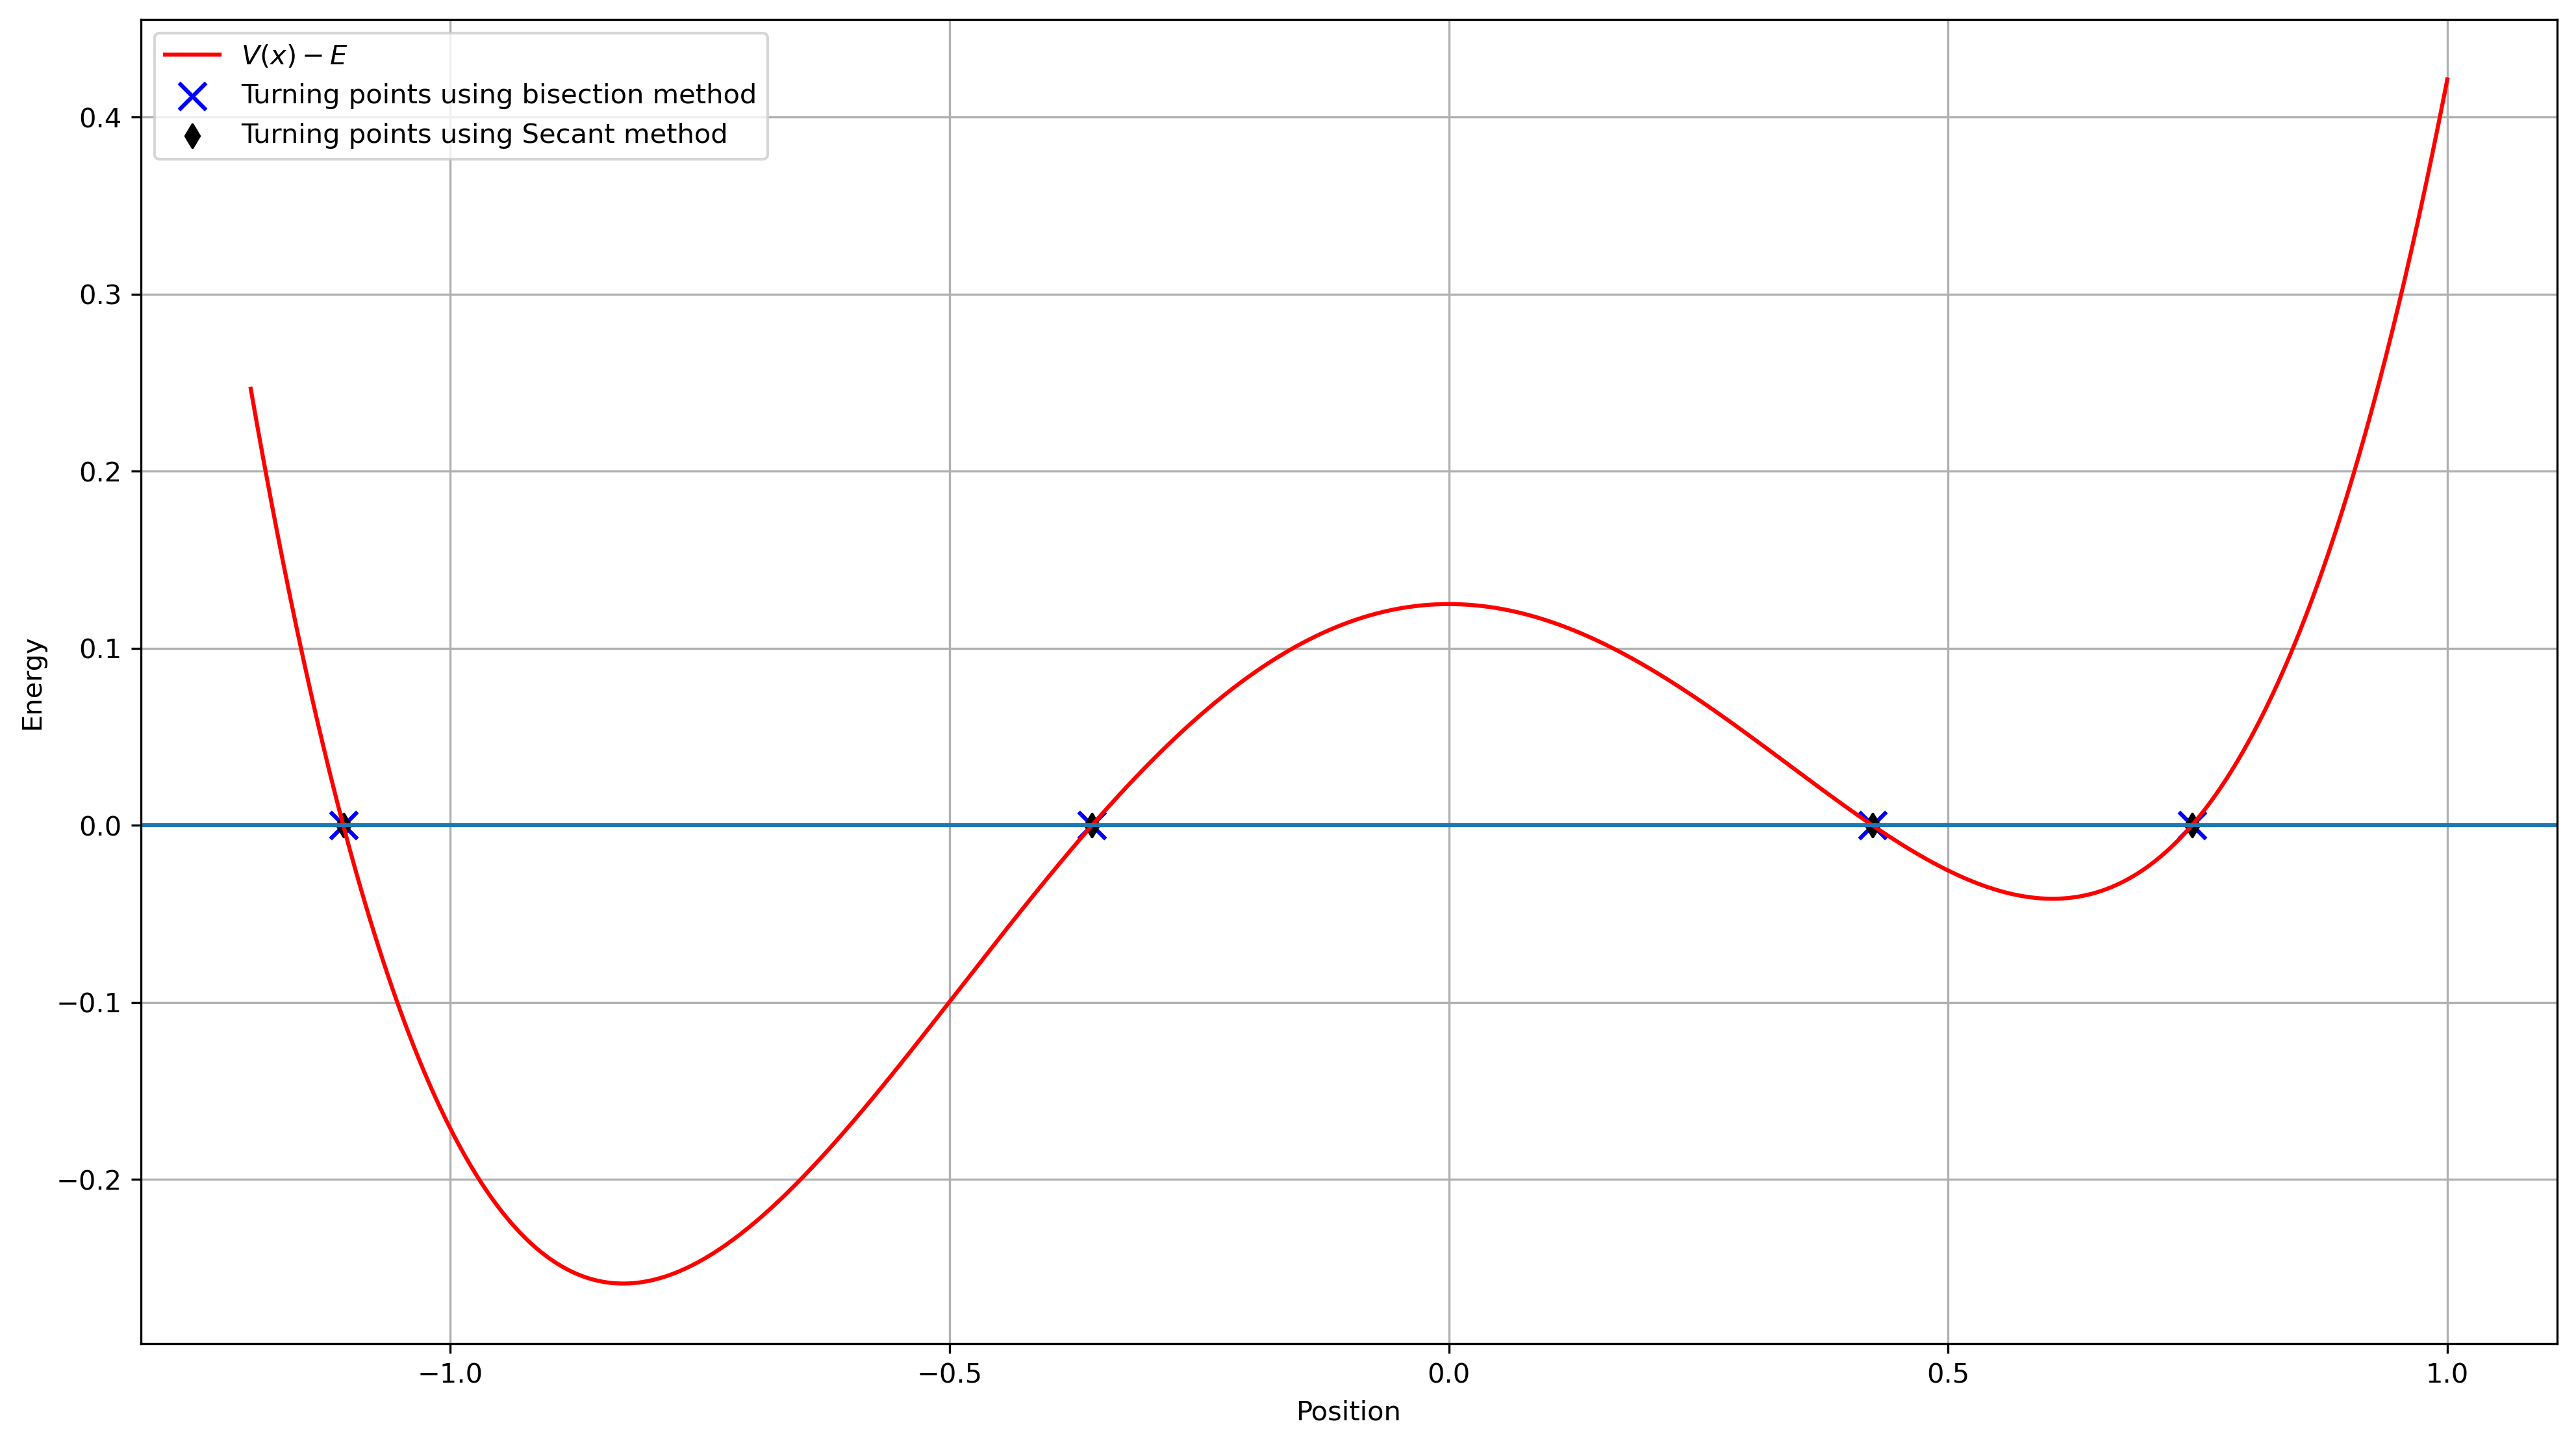

In [21]:
xval = np.linspace(-1.2,1,1000)
yval = V(xval)

fig,axes = plt.subplots(1,1,figsize=(16,9),dpi=300)
axes.plot(xval,yval,"-r", label =r"$V(x) -E$")
axes.axhline()
axes.scatter(bturnpt,betpt, color='b', marker="x", s=100, label="Turning points using bisection method")
axes.scatter(sturnpt,stept, color='k', marker="d", label="Turning points using Secant method")
axes.set_xlabel("Position")
axes.set_ylabel("Energy")
axes.legend()
axes.grid()

#### Comments on the error in the last question

The last question requires the error in the position to be correct upto the fifth decimal point. However here, our error conditions specify that the error calculation is done as to how close the energy is to 0.
`while abs(f(c))>tol`

note here that the degree of our polynomial potential is 4. So this error bound offers a tighter bound, so we can use this. If this was not the case, we would have used `err = abs(x_n - x_n-1)`